In [110]:
import numpy as np
import matplotlib.pyplot as plt

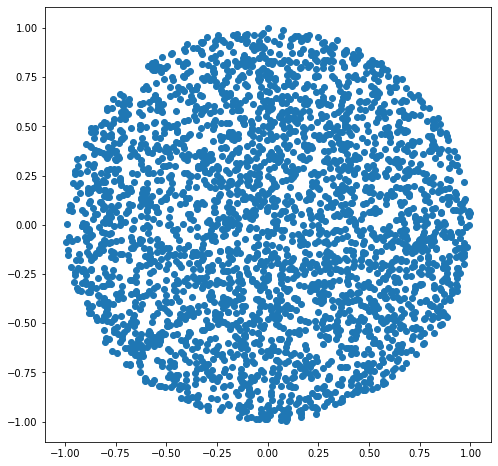

(array([-0.51113159, -0.76895436,  0.85629159, ...,  0.39630833,
        -0.21727833,  0.4660695 ]),
 array([ 0.52368221,  0.59434032,  0.06149966, ...,  0.75680172,
        -0.02551802,  0.43899318]))

In [111]:
# Step 1: Generate N points randomly in the unit circle.  
#
# Idea 1: Generate points in the unit square first  
#         and then get rid of points outside the circle.  
# Idea 2: Use function generate_random_point_inside_circle (optimizing)  
#         and then use x=r*cos(θ), y=r*sin(θ) to represent the points.  
# Benefit: Speed up the code and reduce unnessecary points cal.  

def generate_random_point_inside_circle(N, x=0, y=0, r=1, show=False):
   
    theta = np.random.random(N) * 2 * np.pi - np.pi    # Sample N angles  
    radius = np.sqrt(np.random.random(N))    # Sample N r^2 and get r  
    x = np.cos(theta) * radius * r + x    # Rectangular coordinate system  
    y = np.sin(theta) * radius * r + y
    if show:
        plt.figure(figsize=(8,8))
        plt.scatter(x, y)
        plt.show()
    return x, y

generate_random_point_inside_circle(3000, 0, 0, 1,show=True)

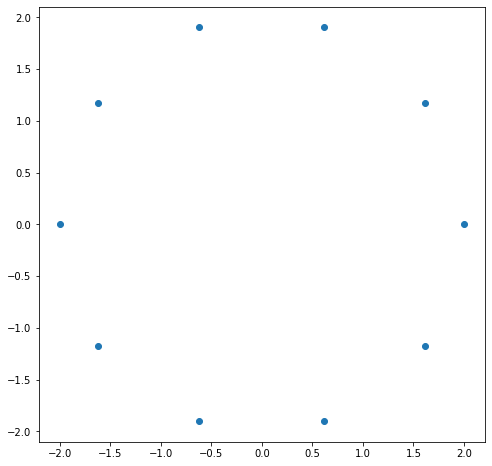

(array([ 2.        ,  1.61803399,  0.61803399, -0.61803399, -1.61803399,
        -2.        , -1.61803399, -0.61803399,  0.61803399,  1.61803399]),
 array([ 0.00000000e+00,  1.17557050e+00,  1.90211303e+00,  1.90211303e+00,
         1.17557050e+00,  2.44929360e-16, -1.17557050e+00, -1.90211303e+00,
        -1.90211303e+00, -1.17557050e+00]))

In [112]:
# Step 2: Generate M points equally on the circle.  

def generate_m_point_on_circle(M, r, x=0, y=0, show=False):
    
    theta = np.linspace(0, 2*np.pi, M + 1)[:-1]    # Sample N angles  
    x = np.cos(theta) * r + x    # Rectangular coordinate system  
    y = np.sin(theta) * r + y
    if show:
        plt.figure(figsize=(8,8))
        plt.scatter(x, y)
        plt.show()
    return x, y

generate_m_point_on_circle(10, 2, show=True)

In [113]:
# Step 3: Calculate the distance  
#
# Solution 1. Set for loop for 3 times  
# Solution 2. Can use numpy functions (optimising)  
# Benefit: Speed up and shorten the code  

def solution2(rps, sps):
    
    nx, ny = rps
    mx, my = sps
    n = nx.shape[0]
    m = mx.shape[0]
    
    x_dis = np.tile(nx, m).reshape(m, -1) - mx.reshape(m, -1)    # Cal difference in x  
    y_dis = np.tile(ny, m).reshape(m, -1) - my.reshape(m, -1)    # Cal difference in y  

    dis = np.sqrt(x_dis ** 2 + y_dis ** 2)    # Cal distance of each point pair  
    dis = np.log(dis) / (np.pi * 2)

    return dis.sum() / (n * m)

## Also have a try to use np.linalg.norm, but the speed is the same as before
    # dis_matrix = np.linalg.norm(np.stack([x_dis, y_dis]), axis=0)
    # dis = np.log(dis_matrix) / (np.pi * 2)

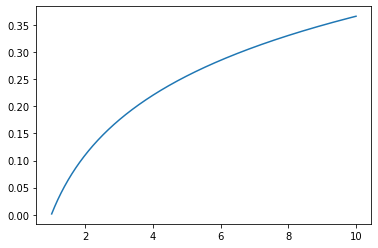

In [114]:
# Step 4: Compute and visualize frs for rs   

if __name__ == "__main__":
    N = 100
    M = 1000

    n = 1000
    rs = np.linspace(1, 10, n)[1:]    # Not include 1
    frs = []
    for r in rs:
        rps = generate_random_point_inside_circle(N)
        sps = generate_m_point_on_circle(M, r)
        fr = solution2(rps, sps)
        frs.append(fr)
    
    frs = np.array(frs)

    plt.plot(rs, frs)
    plt.show()

In [115]:
# Step 5: Calculate E  

e = 0
for r in rs:
    u0 = np.log(r) / (2 * np.pi)
    t = abs(frs - u0) / u0
    e += t

P = 1/((n - 1)*10)
e *= P 
E = np.mean(e)
print(E)

0.12360679564876267


```
N = 100: change the value of M	          M = 100: change the value of N
100 0.12360679760684083	                  100 0.12360679760684083
200 0.12360679474223371	                  200 0.12360679667210246
300 0.12360679562412469	                  300 0.12360679575070395
400 0.1236067957091872	                   400 0.12360679515167006
500 0.12360679564888237	                  500 0.1236067959428097
800 0.12360679564835993	                  800 0.1236067936693031
1000 0.12360679564877312	                 1000 0.12360679484195695

# The value of N and M has light effect on the result of E, but there was still a slight wobble. 
```